In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
df = pd.read_csv('Electric_Production.csv', index_col = 0)

In [10]:
df.head()

,IPG2211A2N
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [11]:
df.index

Index(['1939-01-01', '1939-02-01', '1939-03-01', '1939-04-01', '1939-05-01',
       '1939-06-01', '1939-07-01', '1939-08-01', '1939-09-01', '1939-10-01',
       ...
       '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01',
       '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01'],
      dtype='object', name='DATE', length=954)

In [12]:
# Converting data to time series data

df.index = pd.to_datetime(df.index)

In [13]:
# Date has been converted to index

df.head()

,IPG2211A2N
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [15]:
df.index

DatetimeIndex(['1939-01-01', '1939-02-01', '1939-03-01', '1939-04-01',
               '1939-05-01', '1939-06-01', '1939-07-01', '1939-08-01',
               '1939-09-01', '1939-10-01',
               ...
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01'],
              dtype='datetime64[ns]', name='DATE', length=954, freq=None)

In [17]:
# Checking for missing values

df.isnull().sum()

IPG2211A2N    0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 954 entries, 1939-01-01 to 2018-06-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IPG2211A2N  954 non-null    float64
dtypes: float64(1)
memory usage: 14.9 KB


In [21]:
# Renaming the column

df.columns = ['energy_prod']

In [22]:
df.head()

,energy_prod
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [23]:
# Decomposing the data into trend, seasonal and residual

from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(df)

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

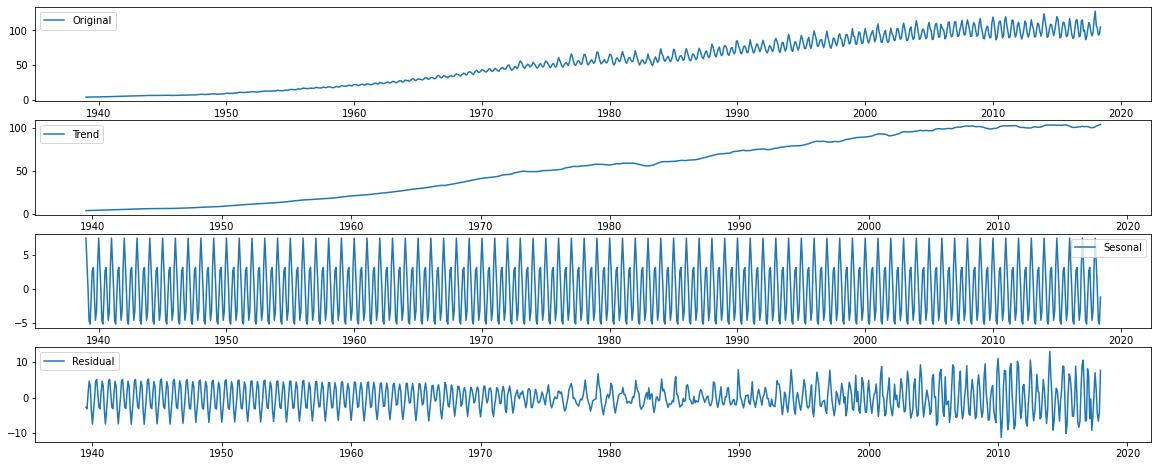

In [26]:
# Plotting the different decompositions

plt.rcParams['figure.figsize'] = (20, 8)
plt.subplot(411)
plt.plot(df, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Sesonal')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residual')
plt.legend(loc = 'best')

In [28]:
! pip install pmdarima


You should consider upgrading via the 'c:\users\kiit\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [30]:
# Using the ARIMA model --> Autoregressive Integrated Moving Average

from pmdarima.arima import auto_arima

model = auto_arima(df, start_p = 1, start_q = 1,
                  max_p = 3, max_q = 3, m = 12,
                  start_P = 0, seasonal = True,
                  d = 1, D = 1, trace = True,
                  error_action = 'ignore',
                  suppress_warnings = True,
                  stepwise = True)
print (model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=3729.023, Time=0.66 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4226.662, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4048.141, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=3850.307, Time=0.34 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.31 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=3728.477, Time=0.93 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=3890.232, Time=0.60 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=3705.062, Time=1.78 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=3775.519, Time=1.38 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=3690.617, Time=4.70 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=3722.200, Time=3.04 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=3789.730, Time=4.41 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=3832.019, Time=5.19 sec
 ARIMA(2,1,1)(2,1,2)[12]             : AIC=3690.547, Time=6.43 sec
 ARIMA(2,1,1)(1,1,2)[12]

In [31]:
model.aic()

3687.480348023315

In [32]:
# Converting data to stationary time series

sta_df = np.log(df) 

In [33]:
df.head()

,energy_prod
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [34]:
# Splitting the data into features and target

# Training the model with all the data from 1939 - 2016
x = sta_df.loc['1939-01-01':'2016-12-01']

# Based on the training, we will predict the data from 2017 - present
y = sta_df.loc['2017-01-01':]

In [35]:
x.head()

,energy_prod
DATE,
1939-01-01,1.219118
1939-02-01,1.226712
1939-03-01,1.249185
1939-04-01,1.256556
1939-05-01,1.256556


In [36]:
x.tail()

,energy_prod
DATE,
2016-08-01,4.749101
2016-09-01,4.626763
2016-10-01,4.507477
2016-11-01,4.524756
2016-12-01,4.729683


In [37]:
y.head()

,energy_prod
DATE,
2017-01-01,4.745888
2017-02-01,4.592996
2017-03-01,4.609001
2017-04-01,4.460350
2017-05-01,4.502331


In [38]:
y.tail()

,energy_prod
DATE,
2018-02-01,4.672881
2018-03-01,4.638972
2018-04-01,4.534820
2018-05-01,4.548848
2018-06-01,4.652571


In [43]:
# Training the model

model.fit(x)

ARIMA(order=(3, 1, 1), scoring_args={}, seasonal_order=(2, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [48]:
# Forecasting the future values

# Forecasting 18 future values
pred = model.predict(n_periods = 18)

In [49]:
pred

array([4.82529314, 4.72488785, 4.62037577, 4.51123119, 4.5298927 ,
       4.65217268, 4.7422911 , 4.74149161, 4.63518664, 4.53669408,
       4.57267908, 4.72718332, 4.81692687, 4.73634252, 4.64137859,
       4.5233499 , 4.5421802 , 4.66121327])

In [50]:
# Creating a new dataframe with forcasted value and date

new_df = pd.DataFrame(pred, index = y.index, columns = ['Prediction'])
new_df.head()

,Prediction
DATE,
2017-01-01,4.825293
2017-02-01,4.724888
2017-03-01,4.620376
2017-04-01,4.511231
2017-05-01,4.529893


In [51]:
y.head()

,energy_prod
DATE,
2017-01-01,4.745888
2017-02-01,4.592996
2017-03-01,4.609001
2017-04-01,4.460350
2017-05-01,4.502331


* From y.head() and new_df.head(), we can see that the forcasted values are much closer to the actual values.

<AxesSubplot:xlabel='DATE'>

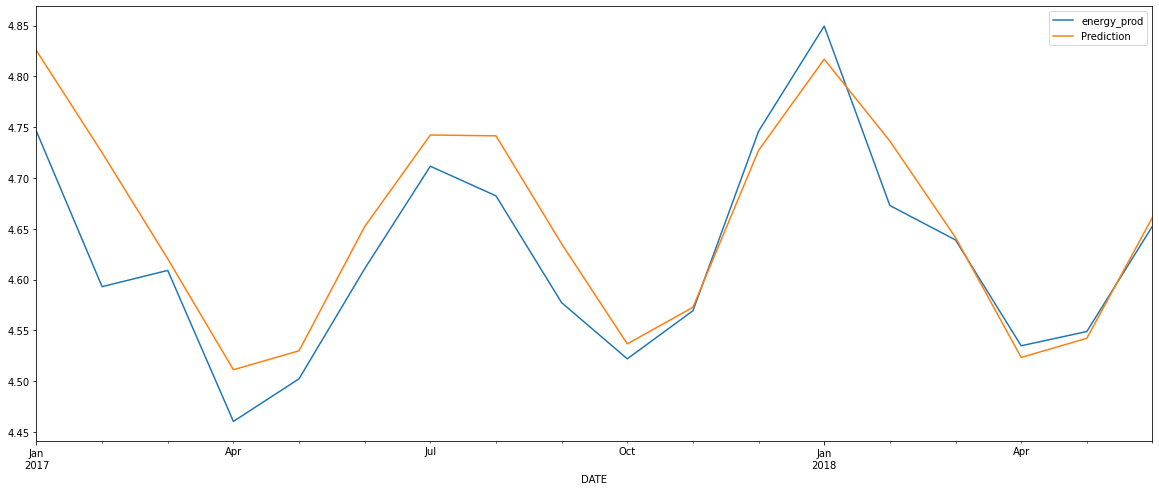

In [56]:
# Plotting the graph between actual and forecasted value

pd.concat([y, new_df], axis = 1).plot()

<AxesSubplot:xlabel='DATE'>

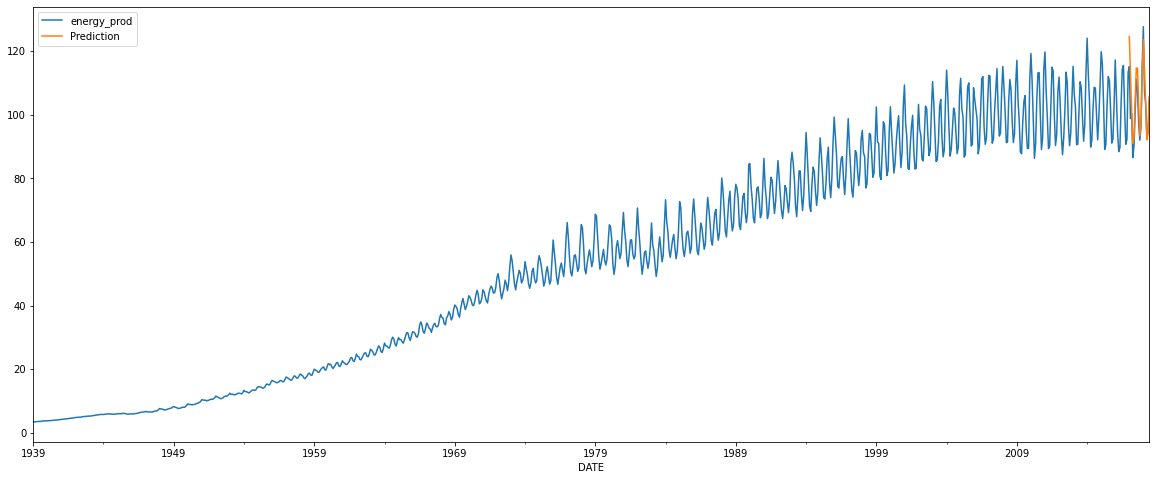

In [58]:
# For clear understanding

forecast = np.exp(new_df)
pd.concat([df, forecast], axis = 1).plot()

* Model can nicely predict the data. 

In [59]:
# Checking the r2_score for accuracy of the model

from sklearn.metrics import r2_score
r2_score(np.exp(y), forecast)

0.7307992504769147